[sklearn.cluster.KMeans example](https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/kmean/kmean.ipynb)

[K-Means Clustering Concept](https://eunsukimme.github.io/ml/2019/12/16/K-Means)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from matplotlib.animation import FuncAnimation
from copy import deepcopy

In [2]:
data_n = 20
data = np.random.randint(0, 100, size=(data_n, 2))
df = pd.DataFrame(data, columns=['x', 'y'])
data_x = df.values[:, 0]
data_y = df.values[:, 1]
centroids_n = 3
centroids = np.zeros(data_n)
means_x = np.zeros(centroids_n)
means_y = np.zeros(centroids_n)
errors = np.zeros(centroids_n)

In [3]:
def charting(means_x, means_y, centroids, init_x=None, init_y=None):
    if init_x is not None:
        if init_y is not None:
            print("     init_x:", init_x)            
            print("     init_y:", init_y)
            plt.scatter(init_x, init_y, c="red")
    # print("  centroids:", centroids)
    print("    means_x:", means_x)
    print("    means_y:", means_y)
    plt.scatter(data_x, data_y, c=centroids)    
    plt.scatter(means_x, means_y, c="blue")

# Reference using sklearn

    means_x: [57.88888889 31.14285714 84.75      ]
    means_y: [20.77777778 61.14285714 60.25      ]


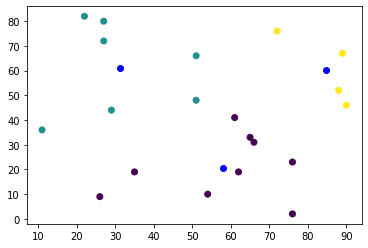

In [4]:
def sklean_kmeans():
    kmeans = KMeans(n_clusters=centroids_n).fit(df.values)
    charting(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.labels_)

sklean_kmeans()

# Reference using  ImadDabbura.kmeans
https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a

    means_x: [31.14285714 57.88888889 84.75      ]
    means_y: [61.14285714 20.77777778 60.25      ]


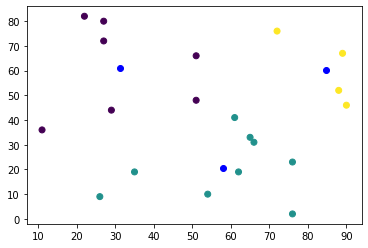

In [5]:
import ImadDabbura.kmeans

def ImadDabburaKmeans():
    km = ImadDabbura.kmeans.Kmeans(n_clusters=centroids_n)
    km.fit(df.values)
    charting(km.centroids[:, 0], km.centroids[:, 1], km.labels)
    
ImadDabburaKmeans()

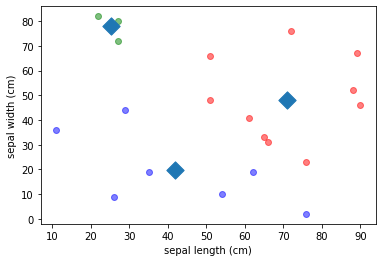

In [6]:
from eunsukimme.kmeans import eunsukimme_kmeans

eunsukimme_kmeans(df.values, centroids_n)

# Implement

## STEP01: Place k random centroids

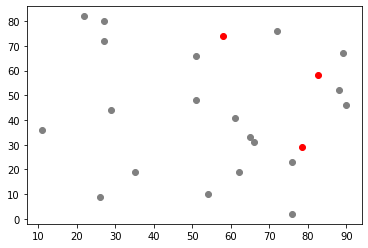

In [7]:
def randomize():
    centroids_x = np.random.uniform(min(data_x), max(data_x), centroids_n)
    centroids_y = np.random.uniform(min(data_y), max(data_y), centroids_n)
    return centroids_x, centroids_y

centroids_x, centroids_y = randomize()
plt.scatter(data_x, data_y, c="gray")
plt.scatter(centroids_x, centroids_y, c="red")

## STEP02: Assign datas to nearest centroids

In [8]:
def distance(x, y, u, v):
    return ((x - u)**2 + (y - v)**2)**0.5

In [9]:
def error(old_x, old_y, new_x, new_y):
    for i in range(centroids_n):
        errors[i] = distance(old_x[i], old_y[i], new_x[i], new_y[i])

    means_x: [82.73989914 78.34603559 58.09127341]
    means_y: [58.22079374 29.14962579 73.80780241]


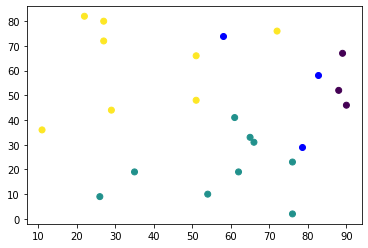

In [10]:
def nearest():
    for d in range(data_n):
        distances = np.zeros(centroids_n)
        for c in range(centroids_n):
            distances[c] = distance(data_x[d], data_y[d], centroids_x[c], centroids_y[c])
        centroids[d] = np.argmin(distances)
    
nearest()
charting(centroids_x, centroids_y, centroids)

## STEP03: Update centroids

    means_x: [82.73989914 78.34603559 58.09127341]
    means_y: [58.22079374 29.14962579 73.80780241]


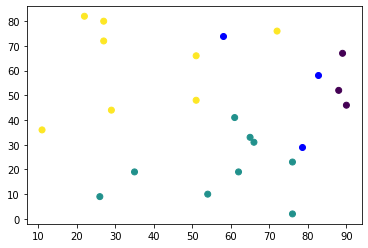

In [11]:
def update():
    counts = np.zeros(centroids_n)
    sum_x = np.zeros(data_n)
    sum_y = np.zeros(data_n)
    for i in range(data_n):
        c = int(centroids[i])
        sum_x[c] = sum_x[c] + data_x[i]
        sum_y[c] = sum_y[c] + data_y[i]
        counts[c] = counts[c] + 1
    
    for c in range(centroids_n):
        means_x[c] = sum_x[c] / counts[c];
        means_y[c] = sum_y[c] / counts[c];
    
update()
charting(centroids_x, centroids_y, centroids)

      count: 1
     init_x: [25.1385366  65.96284866 21.84087817]
     init_y: [35.32006234 72.12602251 37.98200653]
    means_x: [89.         57.88888889 36.25      ]
    means_y: [55.         20.77777778 63.        ]


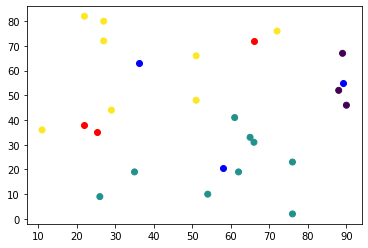

In [12]:
def cluster(repeat):
    count = 0
    centroids_x, centroids_y = randomize()
    init_x = deepcopy(centroids_x)
    init_y = deepcopy(centroids_y)
    for i in range(repeat):
        nearest()
        update()
        error(centroids_x, centroids_y, means_x, means_y)        
        centroids_x = deepcopy(means_x)
        centroids_y = deepcopy(means_y)
        count = count + 1
        
    print("      count:", count)
    charting(centroids_x, centroids_y, centroids, init_x, init_y)

cluster(1)

      count: 100
     init_x: [13.1901945  60.56333518 30.36735686]
     init_y: [76.69094184 17.67697254 58.82216826]
    means_x: [89.         57.88888889 36.25      ]
    means_y: [55.         20.77777778 63.        ]


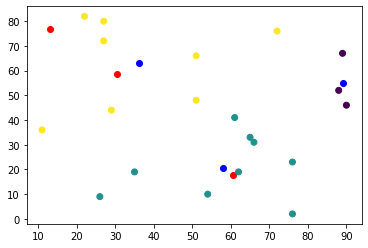

In [13]:
cluster(100)

      count: 10000
     init_x: [32.43407395 40.07113927 48.54245237]
     init_y: [78.13217797  6.78404425 35.30667849]
    means_x: [89.         57.88888889 36.25      ]
    means_y: [55.         20.77777778 63.        ]


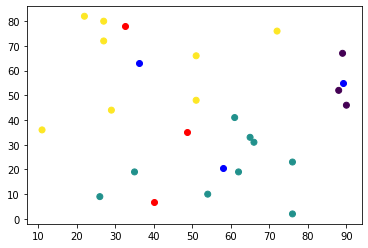

In [14]:
cluster(10000)

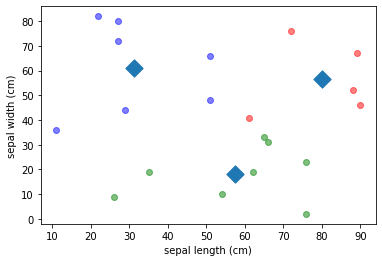

In [15]:
eunsukimme_kmeans(df.values, centroids_n)

    means_x: [57.2        27.83333333 84.75      ]
    means_y: [23.5        63.33333333 60.25      ]


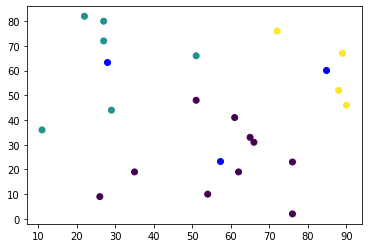

In [16]:
sklean_kmeans()

    means_x: [41.85714286 31.75       73.11111111]
    means_y: [19.85714286 75.         46.33333333]


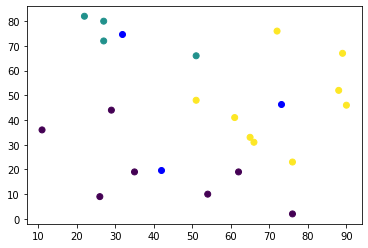

In [17]:
ImadDabburaKmeans()